In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import scikitplot as skplt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

# Carregando base de dados  pré-processada

In [2]:
database = pd.read_csv("../../Database/dataBaseWithNER.csv")

database = database.drop(columns=["Unnamed: 0"])
database = database.dropna()
target = database["target"].array
database

,email,target
0,start date hourahead timee cardinall hou...,0
1,service long desk price structure deal quote ...,0
2,start date cardinall hourahead timee card...,0
3,start date hourahead timee cardinall anc...,0
4,cardinall deliverable revenue management marke...,0
...,...,...
33340,bio matrix scientific group symbo bmxg p...,1
33341,cardinall step away hot naked webcam girl liv...,1
33342,need pill increase performance click seroius ...,1
33343,datee final nom inlet hpl eastrans car...,0


In [3]:
emailsText = []
for email in database["email"]:
    emailsText.append(email)

In [4]:
print(len(emailsText))

33341


# Representação vetorial Bag of Words

In [5]:
vectorizer = CountVectorizer(max_features=2100)
X = vectorizer.fit_transform(emailsText)

bag = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

bag

E:\DevPack\anaconda3\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,ability,able,absolutely,abuse,accept,acceptance,accepted,access,according,...,xanax,xl,xp,yahoo,year,yes,yield,yo,young,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33336,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33337,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualização de dados com TSNE

In [6]:
# model = TSNE(n_components=2, random_state=0)
# #model = PCA(n_components=50, svd_solver='full')
# array_red = model.fit_transform(bag)
#
# df_tsne = pd.DataFrame(array_red)
#
# df_tsne['Target'] = target
# df_tsne_c1 = df_tsne[df_tsne['Target'] == 0]
#
# df_tsne_c2 = df_tsne[df_tsne['Target'] == 1]
#
# plt.scatter(df_tsne_c1[0].array,df_tsne_c1[1].array,marker='o',color='blue')
#
# plt.scatter(df_tsne_c2[0].array,df_tsne_c2[1].array,marker='o',color='red')
#
# plt.title('Dados')
# plt.xlabel('x')
# plt.ylabel('y')
#
# plt.show()

# Validação

In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(database,target,test_size=0.2)

#dfTfidfArray = dfTfidfArray.sample(frac=1)

X_treino.to_csv("train.csv")
X_teste.to_csv("test.csv")

print(X_treino)

                                                   email  target
2724   hi lousie tammie  kimberly  instruction  sendi...       0
7321   louise  know  swamped  emailing   happy procee...       0
2508   auto  generated e  mail   training service  au...       0
11202  welcome health suite  chek  cial x viagr valiu...       1
1113    custom  big       trading alert     timing   ...       1
...                                                  ...     ...
4125   personn  computed hc historical volatility dat...       0
17458  favorite program incredibly low pr  ce check a...       1
13506  like originalbut cardinall pricepowerful effec...       1
24918  orgg  gpee p  transport contract datee benn as...       0
3719                         forwarded orgg datee  ca...       0

[26672 rows x 2 columns]


In [8]:
model = keras.models.Sequential([

########## MLP
keras.layers.Flatten(input_shape=(X_treino.shape[1],)),
#keras.layers.Dense(300, activation="relu"),
#keras.layers.Dense(1000, activation="relu"),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),

keras.layers.Dense(len(set(target)), activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2100)              0         
                                                                 
 dense (Dense)               (None, 300)               630300    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 660,602
Trainable params: 660,602
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [11]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4,
                                                  mode='min')]

callbacks.append(
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True))

history = model.fit(np.array(X_treino), np.array(y_treino), epochs=200,
                    validation_split=0.05,
                    callbacks=callbacks
                    )

Epoch 1/200
792/792 [==============================] - 3s 2ms/step - loss: 0.1140 - accuracy: 0.9653 - val_loss: 0.0808 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 2/200
792/792 [==============================] - 2s 2ms/step - loss: 0.0307 - accuracy: 0.9889 - val_loss: 0.0619 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 3/200
792/792 [==============================] - 2s 2ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0638 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 4/200
792/792 [==============================] - 2s 2ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0815 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 5/200
792/792 [==============================] - 2s 2ms/step - loss: 0.0360 - accuracy: 0.9934 - val_loss: 0.0784 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 6/200
792/792 [==============================] - 2s 2ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0850 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 7/200
792/792 [==============================] - 2s 2ms/st

## VALIDANDO DE FORMA MAIS ELABORADA

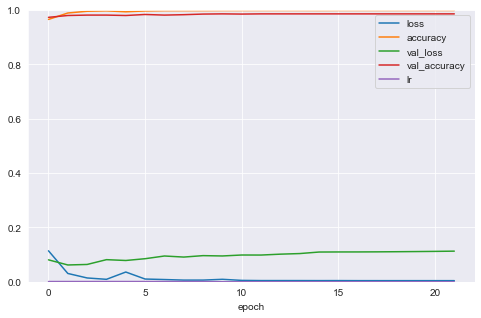

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('epoch')
plt.show()

In [30]:
model.evaluate(np.array(bag.values), np.array(target))

1042/1042 [==============================] - 2s 2ms/step - loss: 0.0249 - accuracy: 0.9923


[0.024894481524825096, 0.9922617673873901]

1042/1042 [==============================] - 1s 963us/step


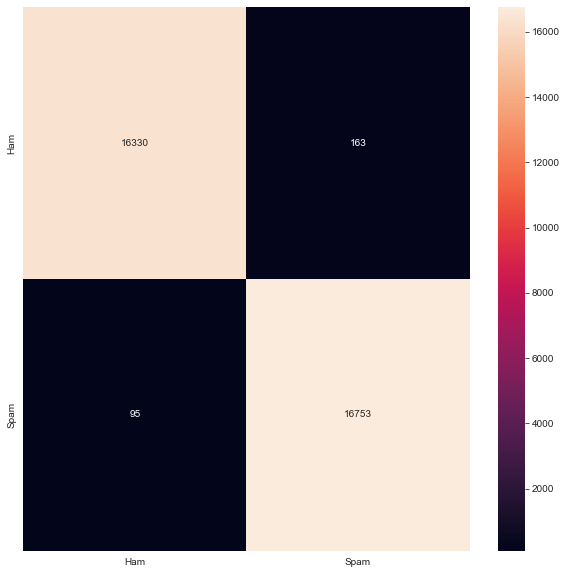

In [34]:
cm = confusion_matrix(target,np.argmax(model.predict(bag.values), axis=-1))

labels = ["Ham", "Spam"]

cm_df = pd.DataFrame(cm, columns=labels)


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm_df, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

plt.show()